In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Load dataset
df = pd.read_csv('penguins_cleaned.csv')

# Data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nSpecies distribution:")
print(df['species'].value_counts())
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (333, 7)

First 5 rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7                181   
1  Adelie  Torgersen            39.5           17.4                186   
2  Adelie  Torgersen            40.3           18.0                195   
3  Adelie  Torgersen            36.7           19.3                193   
4  Adelie  Torgersen            39.3           20.6                190   

   body_mass_g     sex  
0         3750    male  
1         3800  female  
2         3250  female  
3         3450  female  
4         3650    male  

Species distribution:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Missing values:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


**DATA PROCESSING**

In [4]:
# Handle missing values if any
df = df.dropna()

# Encode categorical variables
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])  # Store encoded species
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])

# Prepare features and target
X = df.drop(['species', 'species_encoded'], axis=1)
y = df['species_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**training**

In [6]:
# Handle missing values if any
df = df.dropna()

# Encode categorical variables
le = LabelEncoder()
# First encode the species for the entire dataset before splitting
df['species_encoded'] = le.fit_transform(df['species'])  # This ensures all classes are known
class_names = le.classes_  # Store the class names for later use

# Encode other categorical features
df['island'] = LabelEncoder().fit_transform(df['island'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])

# Prepare features and target
X = df.drop(['species', 'species_encoded'], axis=1)
y = df['species_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize and train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate model
print("\nInitial Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Initial Model Evaluation:
Accuracy: 99.00%

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Confusion Matrix:
[[48  0  0]
 [ 1 22  0]
 [ 0  0 29]]


In [8]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_scaled, y_train)

# Get best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

# Evaluate tuned model
print("\nBest Parameters:", grid.best_params_)
print("\nTuned Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=class_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best, labels=unique_classes))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

<Figure size 1200x800 with 0 Axes>

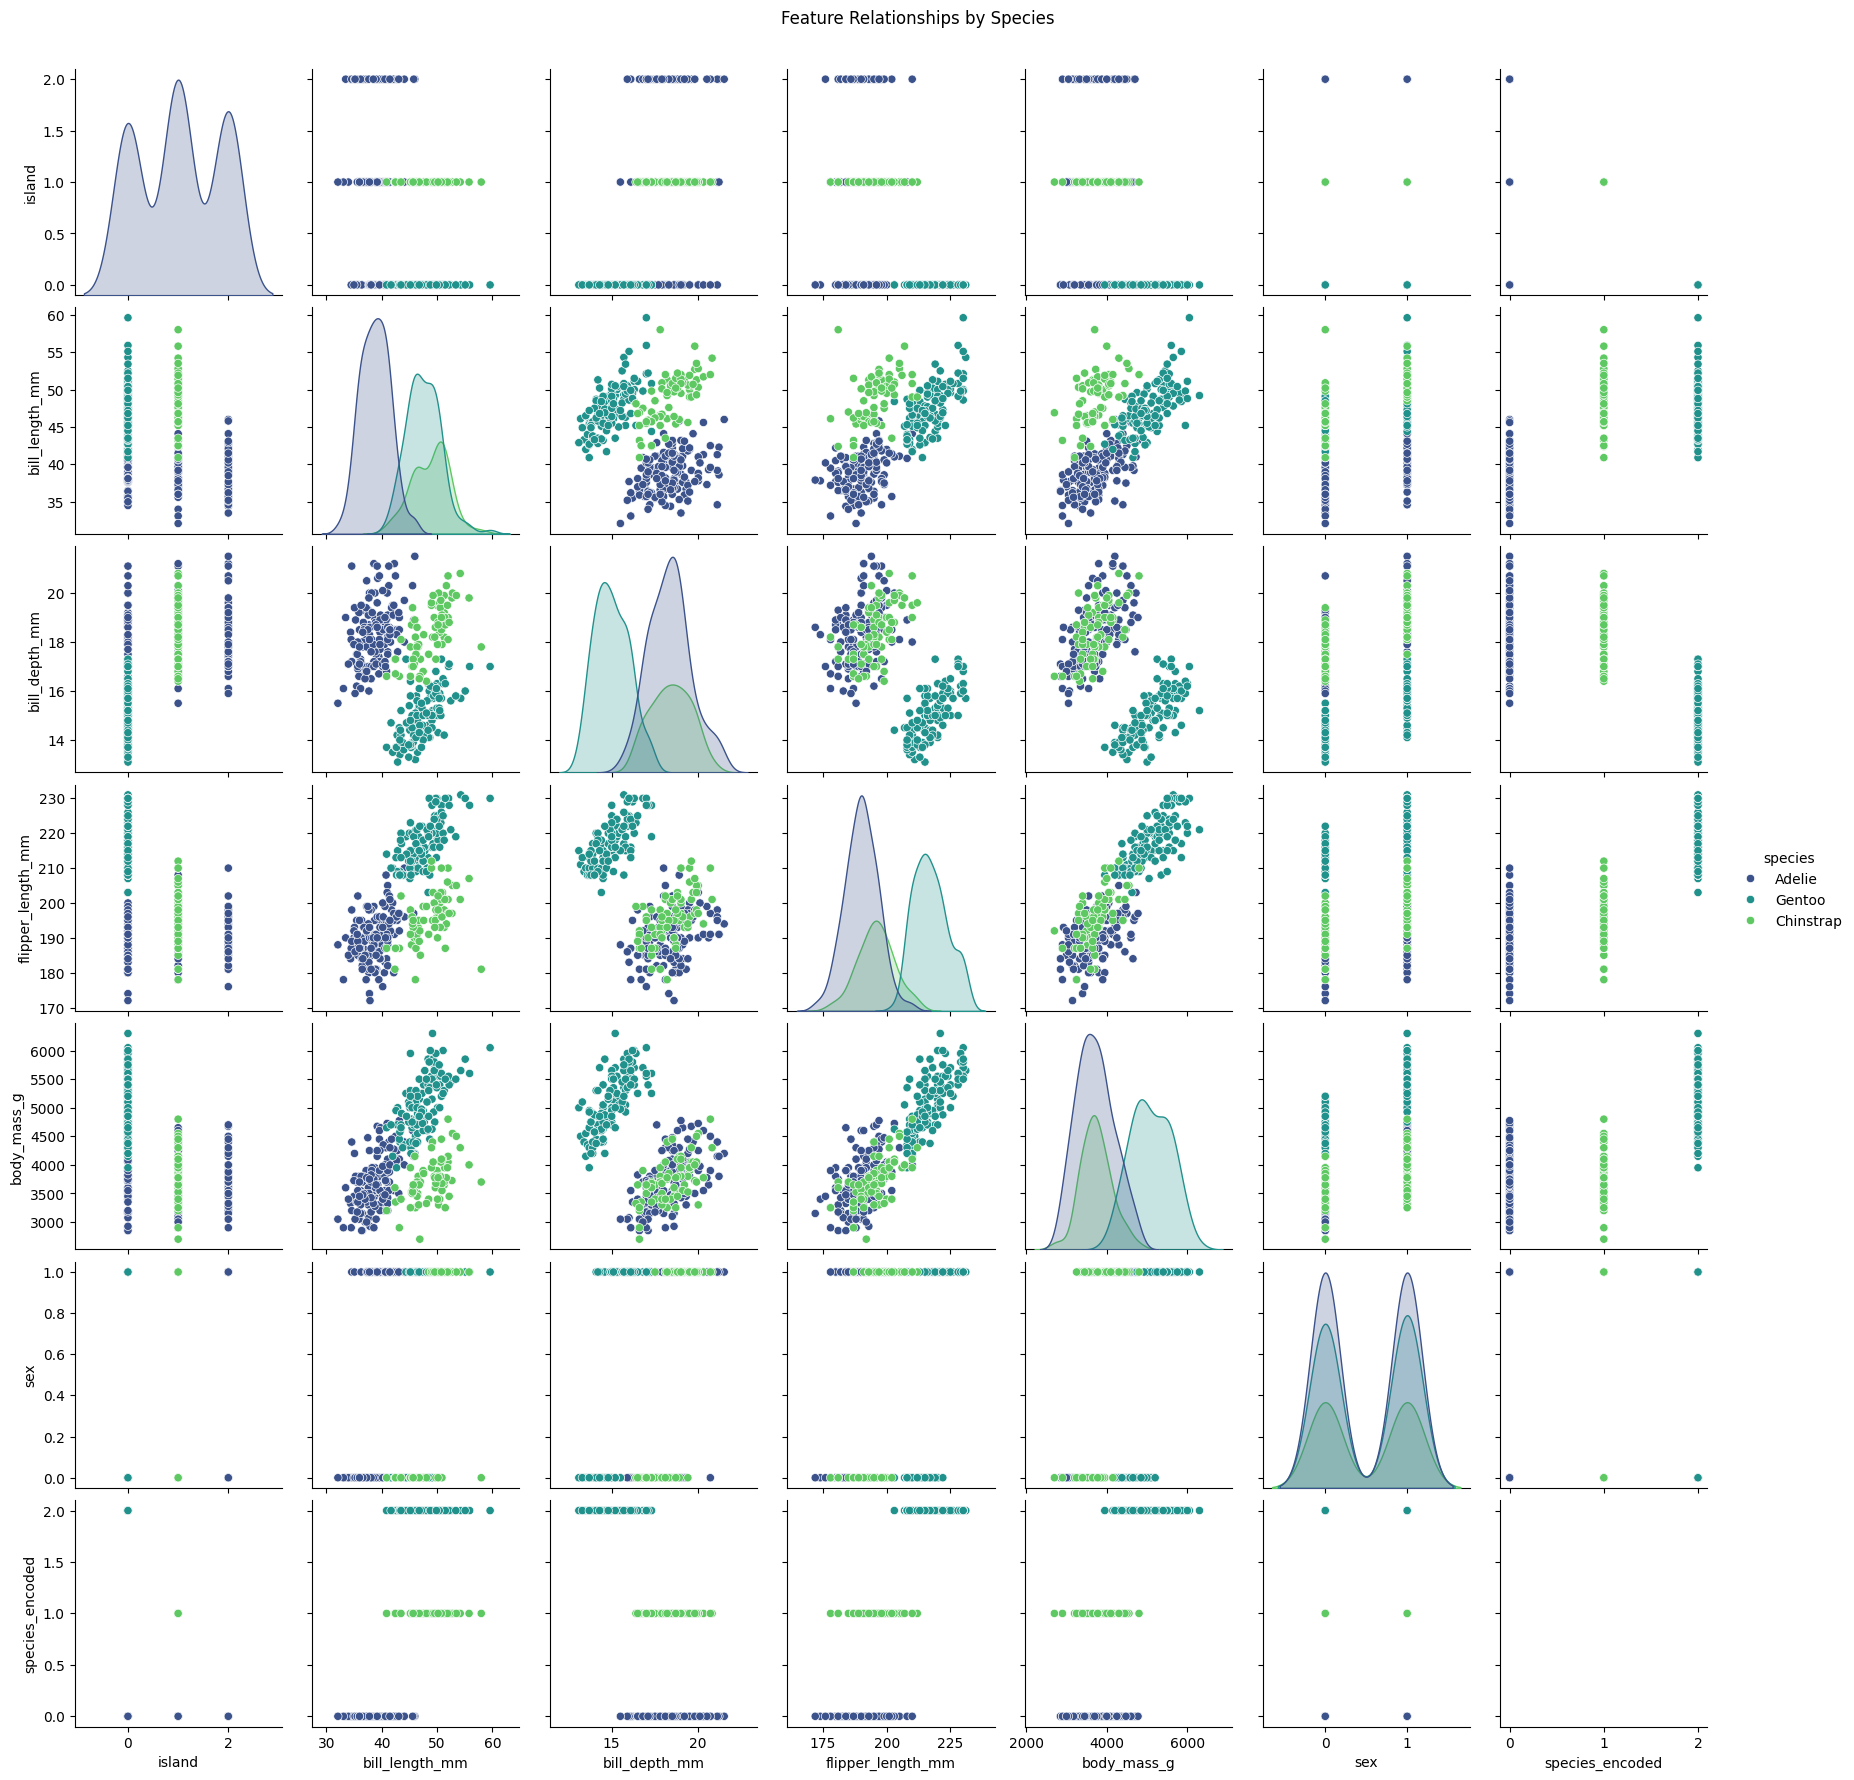

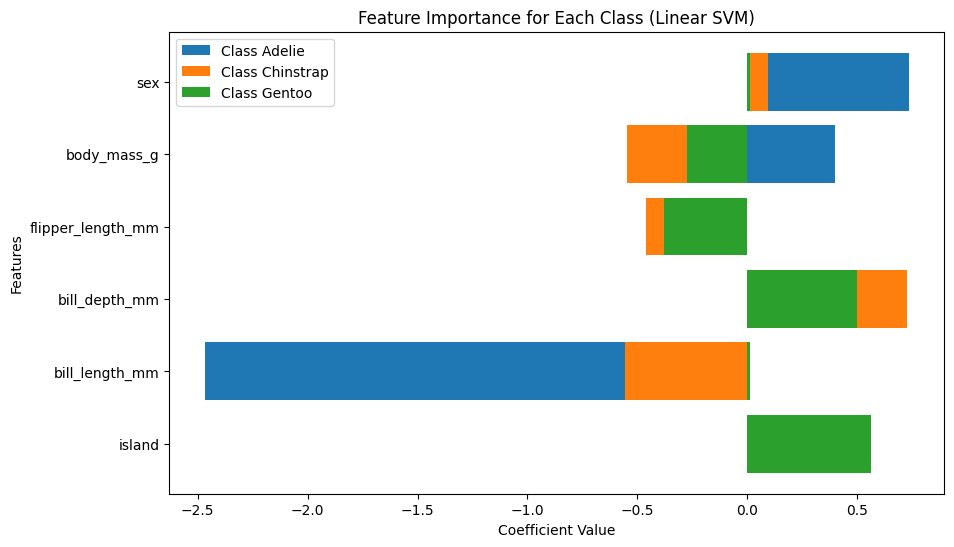

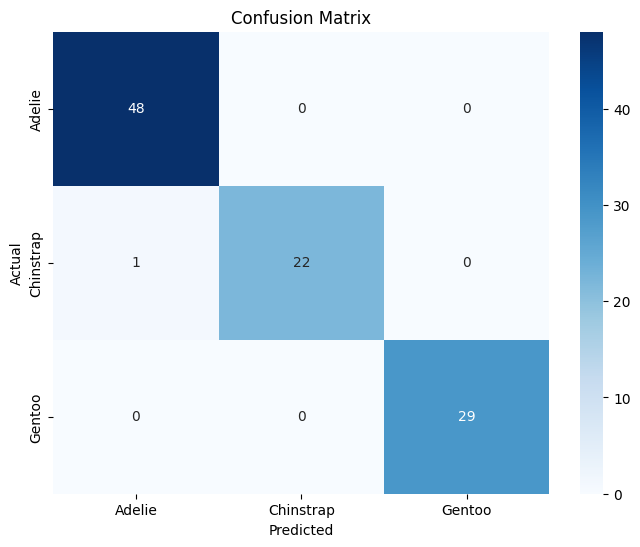

In [9]:
# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Feature Relationships by Species', y=1.02)
plt.show()

# Feature importance (using linear kernel)
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train_scaled, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
importance = linear_svm.coef_
for i in range(len(class_names)):
    plt.barh(X.columns, importance[i], label=f'Class {class_names[i]}')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance for Each Class (Linear SVM)')
plt.legend()
plt.show()

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_best, labels=unique_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()